# Welcome to the top-set-parameters-selection notebook
### Let's start by loading some modules

In [25]:
%load_ext autoreload
%autoreload 2

from survey_summ import SurveySummary
import matplotlib.pyplot as plt
from glob import glob
#import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define the paths where you want to load the files and store the results
- If you are using just one big table per synthetic model (preferred), execute just the cell below.
- Otherwise, symlink all files to a common directory and load from there, as done in the second cell.

In [26]:
inpath = '/home/aefez/Analysis/EHT/SgrA/survey_imaging_ws/05_14_sw/all/synthetic/'
outpath = inpath + '../summary/'

### Define the synthetic models, parameters, and the metric to analyze

In [27]:
models =['crescent', 'simple_disk',
         'double_source', 'elliptical_disk', 'ring']
param_list = ['avgtime', 'sys_noise', 'sys_noise_imaging', 'noise_floor',
              'fwhm', 'tv2', 'simple', 'l1', 'tv', 'rgauss']
param_list_sw = ['avgtime', 'sys_noise', 'noise_floor', 'fwhm', 'sw_amp',
                 'sw_cphase', 'sw_logcamp', 'sw_bs', 'variance_img_diff']
metric = 'nxcorr_descattered'
threshold = 0.92
model_thres = {model: threshold for model in models}

### Run the summary

In [30]:
summ = SurveySummary(inpath, outpath, models, param_list_sw, metric,
                     model_thres)
summ.run()


---> Getting list of table files

7 table files were found

---> Creating table with all parameters


Unknown model "ring+hs_period30"
model: double_source
model: simple_disk
Unknown model "ring+hs_period10"
model: crescent
model: elliptical_disk
model: ring


---> Filtering table


Model "crescent" has 854 matches
Model "simple_disk" has 864 matches
Model "double_source" has 9 matches
Model "elliptical_disk" has 807 matches
Model "ring" has 863 matches


---> Done!



### Show the top set parameters selected

In [22]:
summ.table_top

,noise_floor,fwhm,sw_amp,sw_cphase,sw_logcamp,sw_bs,variance_img_diff,metric_crescent,avgtime,sys_noise,...,metric_elliptical_disk,model_elliptical_disk,id_elliptical_disk,pfile_elliptical_disk,sfile_elliptical_disk,metric_ring,model_ring,id_ring,pfile,sfile
0,-1,80,0.1,10.0,100.0,1.0,5.000000e-08,0.925617,scan,0.02,...,0.945714,elliptical_disk,00492,elliptical_disk_netcal_LMTcal_scan_02sys_00492...,elliptical_disk_netcal_LMTcal_scan_02sys_00492...,0.950298,ring,00492,ring_netcal_LMTcal_scan_02sys_00492_params.txt,ring_netcal_LMTcal_scan_02sys_00492_sw_stats.txt
1,-1,80,0.1,100.0,100.0,1.0,5.000000e-08,0.937108,scan,0.02,...,0.948792,elliptical_disk,00501,elliptical_disk_netcal_LMTcal_scan_02sys_00501...,elliptical_disk_netcal_LMTcal_scan_02sys_00501...,0.960552,ring,00501,ring_netcal_LMTcal_scan_02sys_00501_params.txt,ring_netcal_LMTcal_scan_02sys_00501_sw_stats.txt
2,-1,80,0.1,10.0,100.0,1.0,1.000000e-07,0.929456,scan,0.02,...,0.930087,elliptical_disk,00636,elliptical_disk_netcal_LMTcal_scan_02sys_00636...,elliptical_disk_netcal_LMTcal_scan_02sys_00636...,0.964286,ring,00636,ring_netcal_LMTcal_scan_02sys_00636_params.txt,ring_netcal_LMTcal_scan_02sys_00636_sw_stats.txt


### Plot the results
Play with the figure size depending on the number of parameters combinations selected

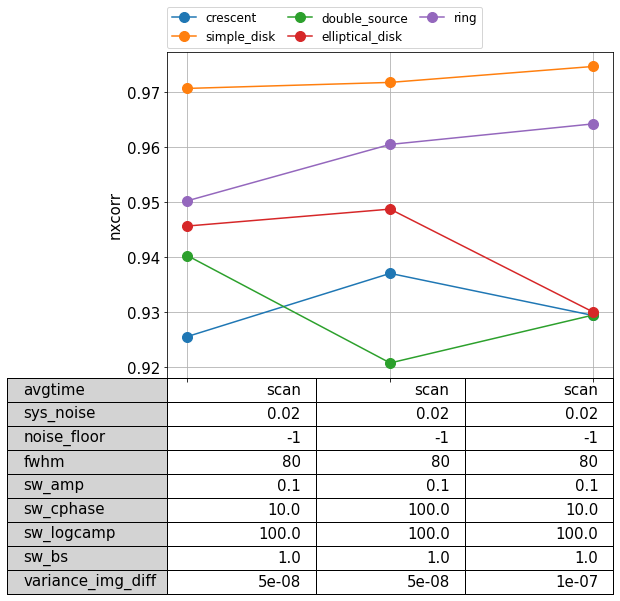

In [23]:
plt.rc('font', size=15)
fig = plt.figure(figsize=(8, 6))

for model in models:
    col = 'metric_' + model
    try:
        val = summ.table_top[col].values
    except KeyError:
        print('Model "{}" not found'.format(model))
        continue
    
    ax = plt.gca()
    ax.plot(val, marker='o', ms=10, label=model)
    ax.grid()
    ax.set_xticks(range(len(summ.table_top.index)))
    if 'nxcorr' in metric: ax.set_ylabel('nxcorr')
    else: ax.set_ylabel('metric')
    ax.set_xticklabels('')
    ax.legend(loc=(-0.0, 1.01), ncol=3, fontsize=12, columnspacing=1.)
    
    df = summ.table_top[summ.param_list]
    df = df.T
    cell_text = []
    for row in range(len(df.index)):
        cell_text.append([x for x in df.iloc[row]])
    tb = ax.table(cellText=cell_text, rowLabels=df.index.values,
                  colLabels=None, loc='bottom',
                  rowColours=['lightgray']*len(df.index))
    #tb.set_fontsize(10)
    tb.scale(1, 2)

fig.savefig(outpath+'topset_plot.png', format='png', dpi=300, bbox_inches='tight',
            pad_inches=0.05)

### Check model's id

In [24]:
for model in models:
    col = 'id_' + model
    try:
        val = summ.table_top[col]
    except KeyError:
        print('Model "{}" not found'.format(model))
        continue
        
    print(val, '\n')

0    00492
1    00501
2    00636
Name: id_crescent, dtype: object 

0    00492
1    00501
2    00636
Name: id_simple_disk, dtype: object 

0    00492
1    00501
2    00636
Name: id_double_source, dtype: object 

0    00492
1    00501
2    00636
Name: id_elliptical_disk, dtype: object 

0    00492
1    00501
2    00636
Name: id_ring, dtype: object 

